In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# KNN

In [2]:
Precipitaciones = pd.read_csv("prec.csv")

In [3]:
Precipitaciones

,Unnamed: 0,ID,NAME,LAT,LONG,ALT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1,ID741,DEATH VALLEY,36.47,-116.87,-59,7.4,9.5,7.5,3.4,1.7,1.0,3.7,2.8,4.3,2.2,4.7,3.9
1,2,ID743,THERMAL/FAA AIRPORT,33.63,-116.17,-34,9.2,6.9,7.9,1.8,1.6,0.4,1.9,3.4,5.3,2.0,6.3,5.5
2,3,ID744,BRAWLEY 2SW,32.96,-115.55,-31,11.3,8.3,7.6,2.0,0.8,0.1,1.9,9.2,6.5,5.0,4.8,9.7
3,4,ID753,IMPERIAL/FAA AIRPORT,32.83,-115.57,-18,10.6,7.0,6.1,2.5,0.2,0.0,2.4,2.6,8.3,5.4,7.7,7.3
4,5,ID754,NILAND,33.28,-115.51,-18,9.0,8.0,9.0,3.0,0.0,1.0,8.0,9.0,7.0,8.0,7.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,452,ID42992,TWIN-LAKES,38.70,-120.03,2438,210.0,173.0,169.0,104.0,52.0,29.0,15.0,24.0,35.0,72.0,183.0,191.0
452,453,ID43093,BISHOP-CREEK-INTAKE-2,37.25,-118.58,2485,57.0,42.0,33.0,21.0,15.0,11.0,11.0,15.0,17.0,12.0,37.0,45.0
453,454,ID43574,GEM-LAKE,37.75,-119.13,2734,86.0,70.0,71.0,41.0,19.0,15.0,16.0,19.0,23.0,24.0,70.0,77.0
454,455,ID43616,LAKE-SABRINA,37.21,-118.61,2763,75.0,59.0,51.0,33.0,16.0,10.0,11.0,12.0,20.0,18.0,50.0,58.0


## Algoritmo

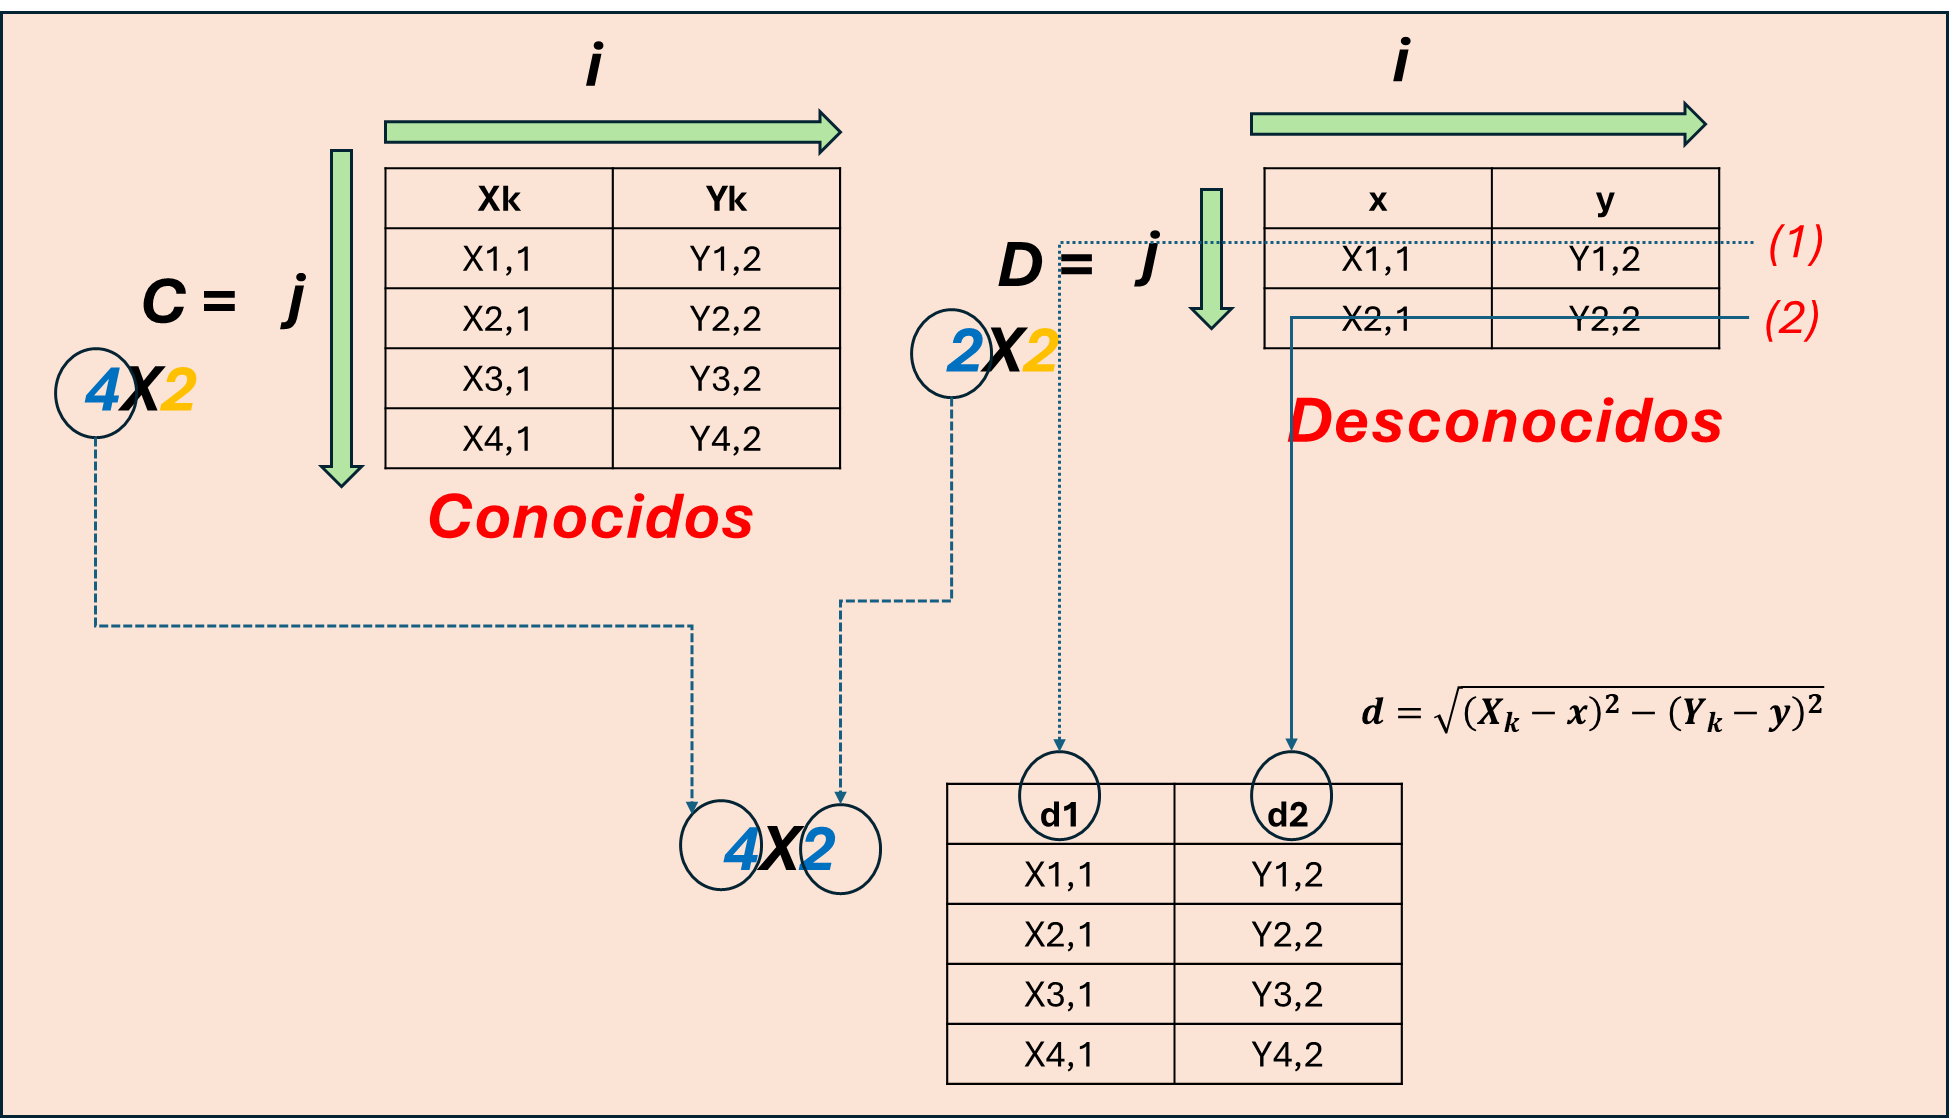

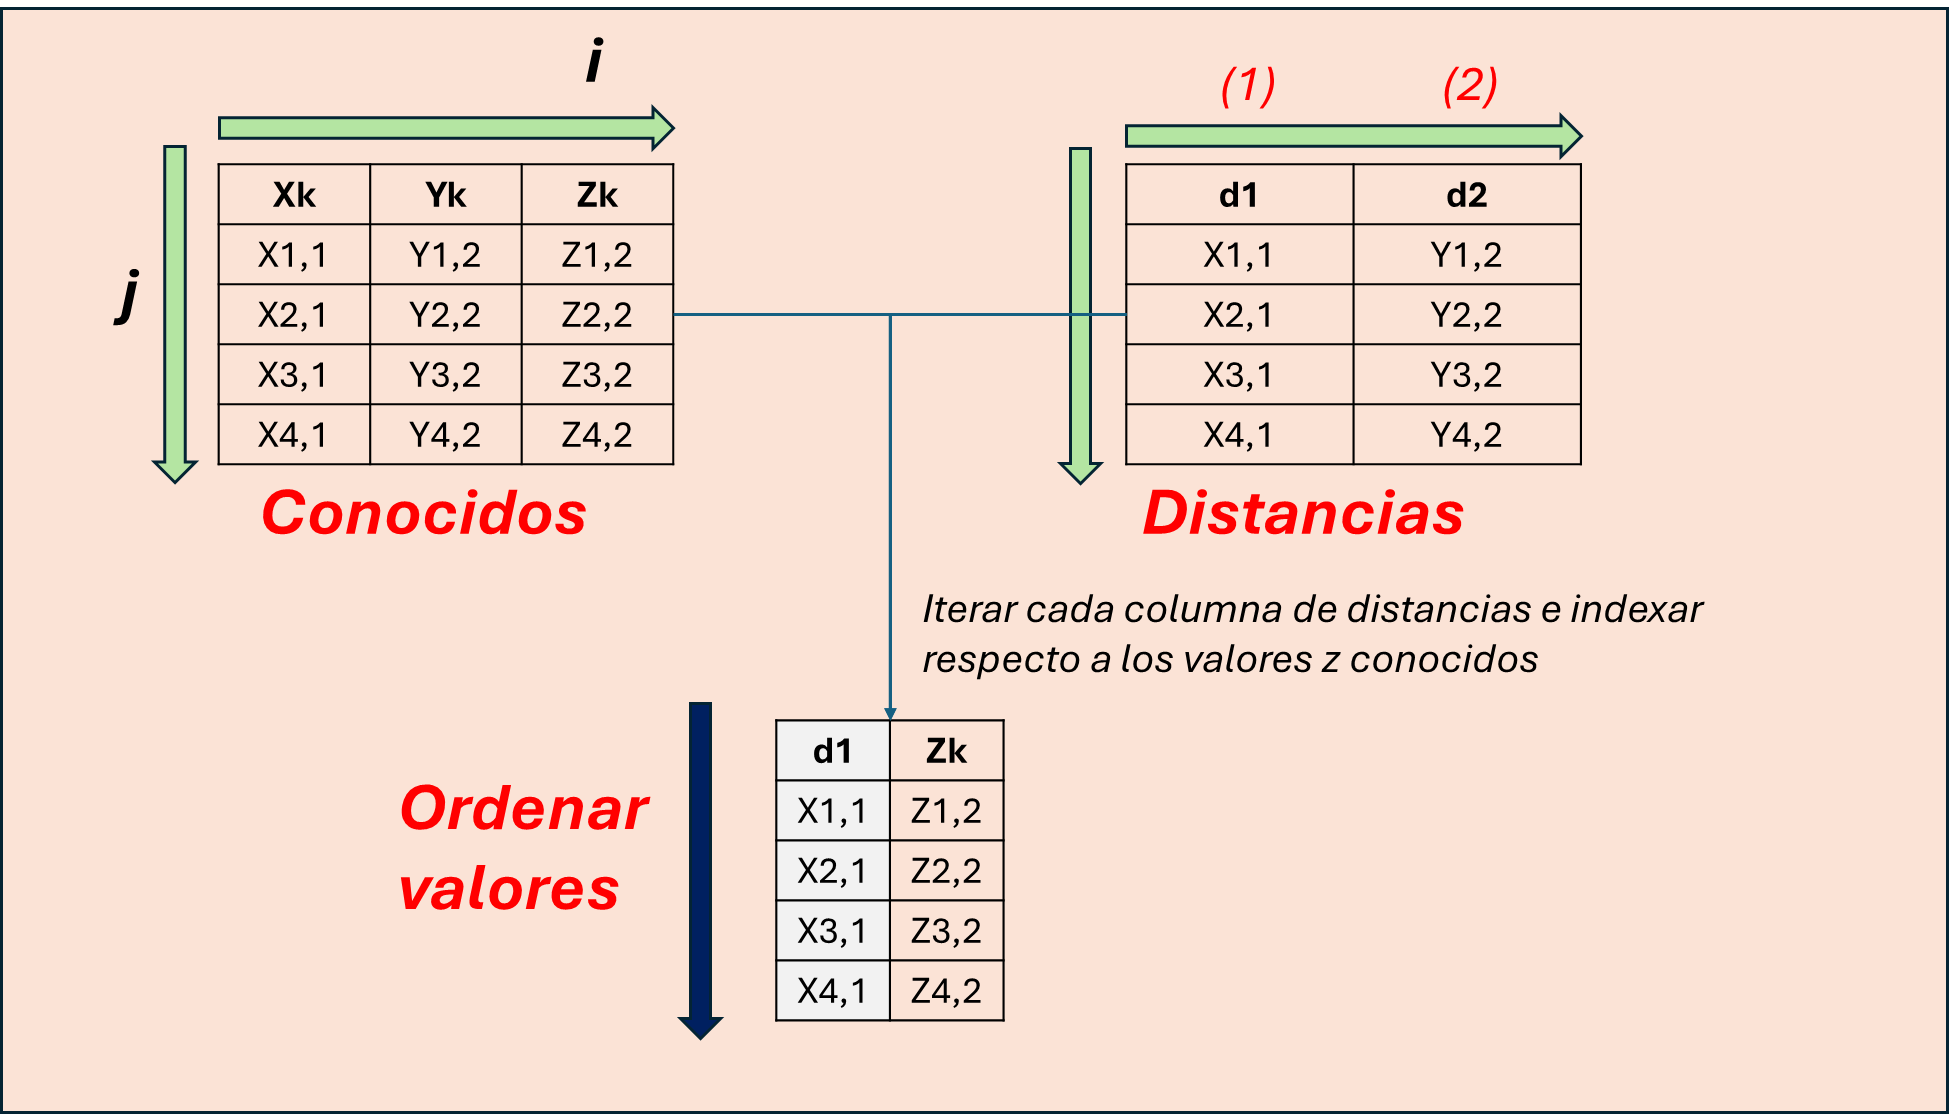

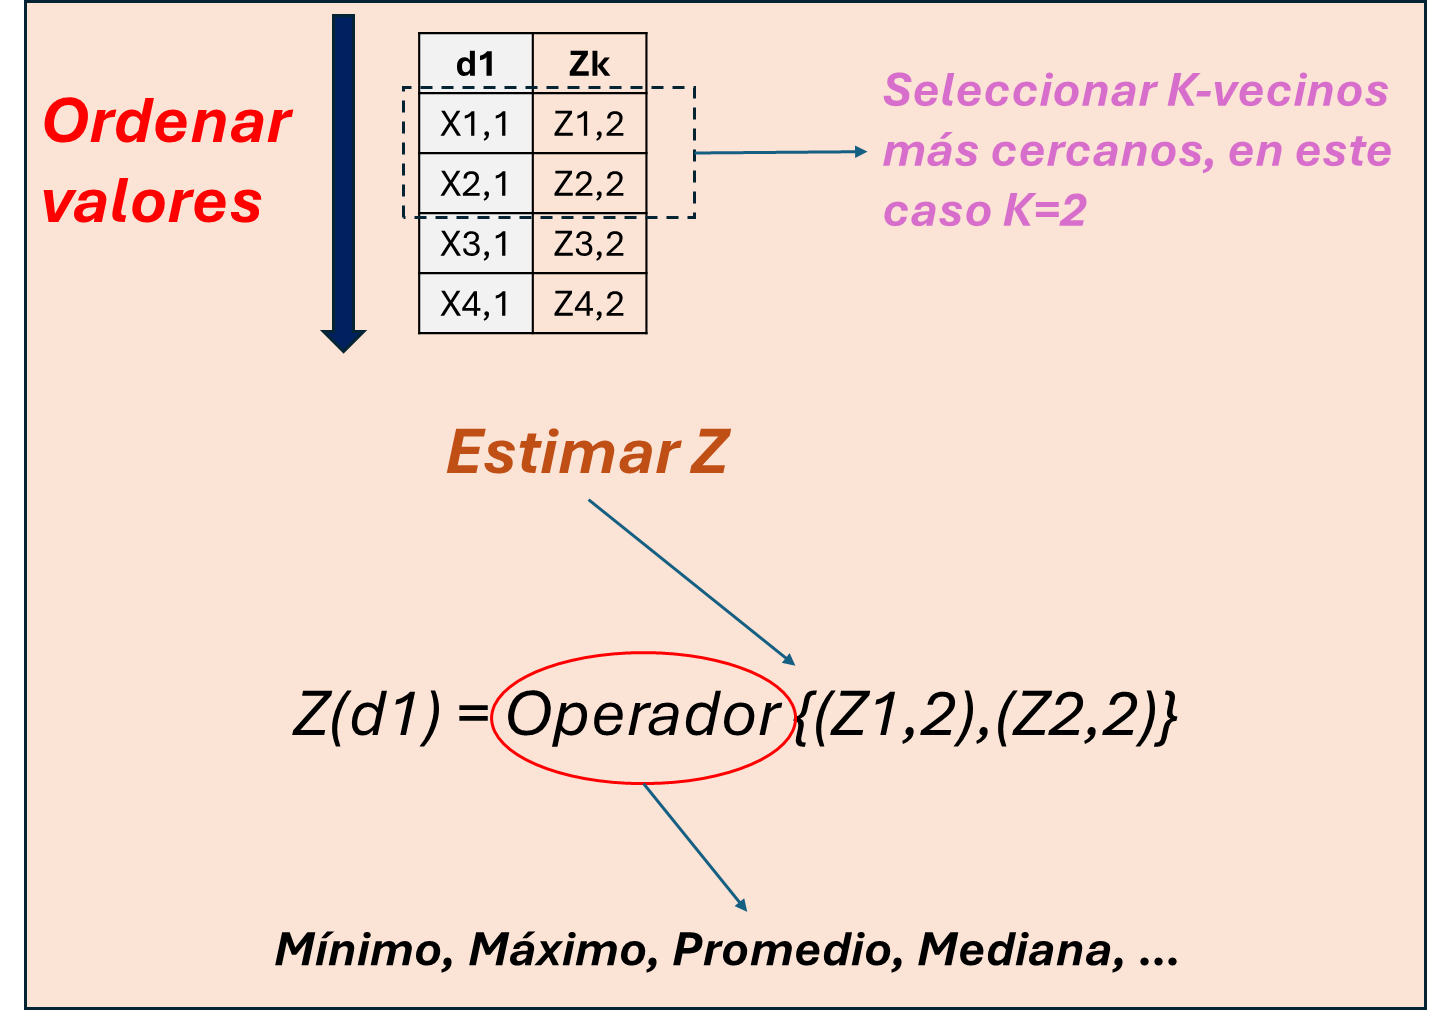

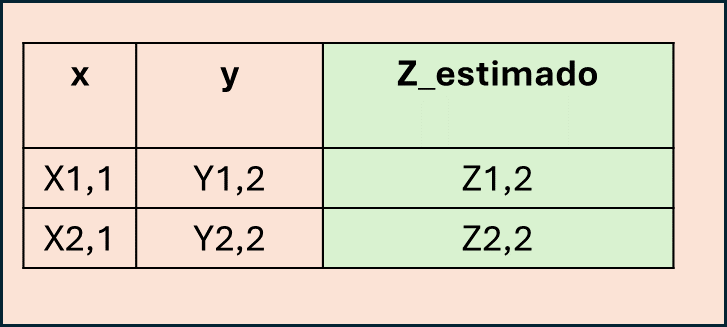

## Precipitaciones de enero

In [4]:
Incognita = np.array([[-118,36],[-118,35]])
Incognita

array([[-118,   36],
       [-118,   35]])

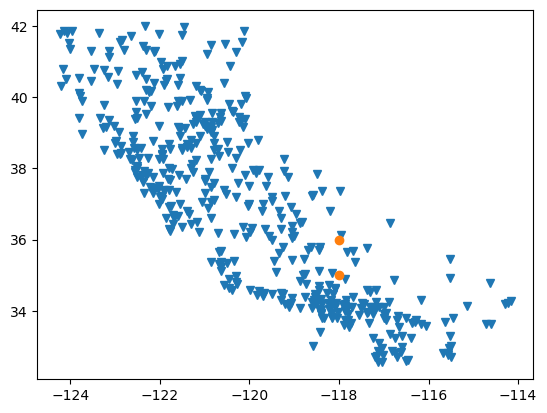

In [5]:
plt.plot(Precipitaciones.LONG, Precipitaciones.LAT, "v")
plt.plot(Incognita[:,0],Incognita[:,1],"o")

In [6]:
def DistanciasEuclideas(xi,yi,x,y):
    #xi,yi: coordenadas de datos conocidos
    #x,y: coordenadas de datos desconocidos
    N_incognitas = len(x)
    N_conocidos = len(xi)

    matriz_distancias = np.ones(N_incognitas*N_conocidos).reshape(N_conocidos,N_incognitas)
    for i in range(N_incognitas):
        for j in range(N_conocidos):
            matriz_distancias[j,i] = np.sqrt((xi[j]-x[i])**2 + (yi[j]-y[i])**2)
    return matriz_distancias

In [7]:
distancias = DistanciasEuclideas(Precipitaciones.LONG, Precipitaciones.LAT, Incognita[:,0],Incognita[:,1])

In [8]:
distancias

array([[1.2238464 , 1.85413052],
       [2.99429457, 2.28600087],
       [3.90436935, 3.18811857],
       [3.99422083, 3.25788275],
       [3.68761441, 3.02630137],
       [3.94224555, 3.19081494],
       [4.05600789, 3.31228018],
       [2.84613773, 2.14021027],
       [2.31354706, 1.78675684],
       [2.41118228, 1.91671594],
       [2.39253004, 1.39434572],
       [2.86006993, 2.14009346],
       [2.1883327 , 1.42435951],
       [4.30360314, 4.7477363 ],
       [4.66309983, 5.12879128],
       [3.86731173, 4.46722509],
       [4.97144848, 5.46400037],
       [4.66652976, 5.0986763 ],
       [4.75394573, 5.21536192],
       [3.5410874 , 2.58443417],
       [7.58023746, 8.21340368],
       [2.20056811, 1.20104121],
       [4.37714519, 4.80202041],
       [5.1390466 , 5.64533436],
       [4.3069827 , 4.95682358],
       [4.28018691, 4.95176736],
       [8.16829236, 8.87361257],
       [3.37616647, 2.42043385],
       [4.4814395 , 4.90339678],
       [4.29418211, 4.84148737],
       [5.

In [9]:
def knn(z_conocidos,Matriz_desconocidos,Matriz_distancias,k):
    N_columnas_distancias = len(Matriz_distancias[0,:].flatten())
    z_estimados = np.ones(N_columnas_distancias)
    for i in range(N_columnas_distancias):
        indexas_dist = z_conocidos.set_index(Matriz_distancias[:,i])
        ordenar_dist = indexas_dist.sort_index()
        vecinos_cercanos = ordenar_dist.loc[0:k]
        prom_zi = vecinos_cercanos.mean().values
        prom_zi = float(prom_zi)
        z_estimados[i]=prom_zi
    return z_estimados

In [10]:
z_estimados = knn(Precipitaciones.loc[:,["JAN"]],Incognita,distancias,3)

In [11]:
z_estimados

array([76.30952381, 72.07336683])

In [12]:
Precipitaciones_estimadas = {"LAT":Incognita[:,0], "LONG":Incognita[:,1], "ENE":z_estimados}
Precipitaciones_estimadas = pd.DataFrame(Precipitaciones_estimadas)

In [13]:
Precipitaciones_estimadas

,LAT,LONG,ENE
0,-118,36,76.309524
1,-118,35,72.073367


# TALLER

Realizar una cuadricula de puntos que abarque toda la extensión de los puntos suministrados en esta práctica y hacer una interpolación de la precipitación empleando algun valor de K

# TAREA

Ya que el modelo debe ser evaluado respecto al error generado en cada predicción al emplear un determinado número de vecinos. Realice una función que estime el error (hagalo con todas las métricas de error conocidas) del modelo a emplear diferentes K-vecinos. Realice una gráfica del error Vs K-vecinos evaluados. Nota: tenga en cuenta que para esta tarea debe seleccionar un % de datos para entrenamiento y % para validarlos.

Una vez hallan encontrado un K óptimo para hacer la predicción, emplear la cuadricula del ejemplo anterior y realice nuevamente la predicción. 

Nota: realice este ejercicio para las precipitaciones de todos los meses y la altura que proporciona el conjunto de datos.

Realizar el mismo procedimiento con un conjunto de datos nuevos proporcionados cada uno de ustedes.